In [157]:
import pandas as pd
import statistics as stat
import datetime
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [158]:
sample_data = pd.read_excel('sample.xls')

In [159]:
pd.set_option('display.max_columns', None)
sample_data.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [160]:
sample_data.tail(5)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [161]:
sample_data.shape

(9994, 21)

In [162]:
sample_data.isnull().any()

Row ID           False
Order ID         False
Order Date       False
Ship Date        False
Ship Mode        False
Customer ID      False
Customer Name    False
Segment          False
Country          False
City             False
State            False
Postal Code      False
Region           False
Product ID       False
Category         False
Sub-Category     False
Product Name     False
Sales            False
Quantity         False
Discount         False
Profit           False
dtype: bool

No missing data => great 

In [163]:
print("Unique Product name: {}".format(len(sample_data['Product Name'].unique().tolist())))
print("All product count: {}".format( sample_data.shape[0]))

Unique Product name: 1850
All product count: 9994


In [164]:
for column in sample_data.columns:
    print("{}: Unique: {}, list: {}".format(str(column),len(sample_data[column].unique().tolist()),sample_data[column].unique().tolist()))


Row ID: Unique: 9994, list: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,

In [165]:
sample_data = sample_data.drop(columns=["Row ID",'Order ID',"Customer ID",'Product ID',"Postal Code","City","Country"])

In [166]:
sample_data.shape

(9994, 14)

In [167]:
sample_data.head() 

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [168]:
sample_data.describe()

,Order Date,Ship Date,Sales,Quantity,Discount,Profit
count,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
mean,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,229.858001,3.789574,0.156203,28.656896
min,2014-01-03 00:00:00,2014-01-07 00:00:00,0.444000,1.000000,0.000000,-6599.978000
25%,2015-05-23 00:00:00,2015-05-27 00:00:00,17.280000,2.000000,0.000000,1.728750
50%,2016-06-26 00:00:00,2016-06-29 00:00:00,54.490000,3.000000,0.200000,8.666500
75%,2017-05-14 00:00:00,2017-05-18 00:00:00,209.940000,5.000000,0.200000,29.364000
max,2017-12-30 00:00:00,2018-01-05 00:00:00,22638.480000,14.000000,0.800000,8399.976000
std,NaN,NaN,623.245101,2.225110,0.206452,234.260108


We don't need to care about order date and ship date in this describe
- We have total 9994 orders.
- Average sales is about 229,858001
- Meadian of sale is 54.49 
- 75% sales is 209.94 which means we have 25% orders is greater than 209.94, but it's still less than the average of sales. 
  => So less than 25% of the top is the most important customer for our bussiness.
  


In [169]:
sample_data.dtypes

Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer Name            object
Segment                  object
State                    object
Region                   object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [170]:
stat.multimode(sample_data['Sales'])

[12.96]

In [171]:
year, sales = stat.linear_regression(sample_data["Order Date"].dt.year,sample_data['Sales']) # sales_forcast = year * year_input + sales

In [172]:
sales_by_year = {"Year" :[], "Sales" : []}
for year_input in range(2014,2020): # 2014 -> 2019 
    sales_by_year["Year"].append( year_input)
    sales_by_year['Sales'].append( round(year * year_input + sales,2))
sales_by_year = pd.DataFrame.from_dict(sales_by_year)
sales_by_year.head()


,Year,Sales
0,2014,239.10
1,2015,233.74
2,2016,228.37
3,2017,223.00
4,2018,217.63


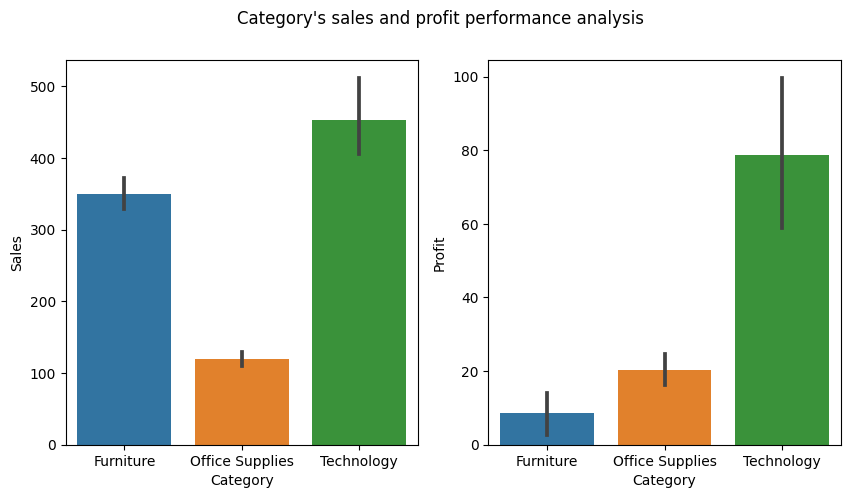

In [203]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
fig.suptitle("Category's sales and profit performance analysis")
sns.barplot(sample_data,x = 'Category', y = 'Sales',ax = ax[0])
sns.barplot(sample_data,x = 'Category', y = 'Profit',ax = ax[1])
plt.show()

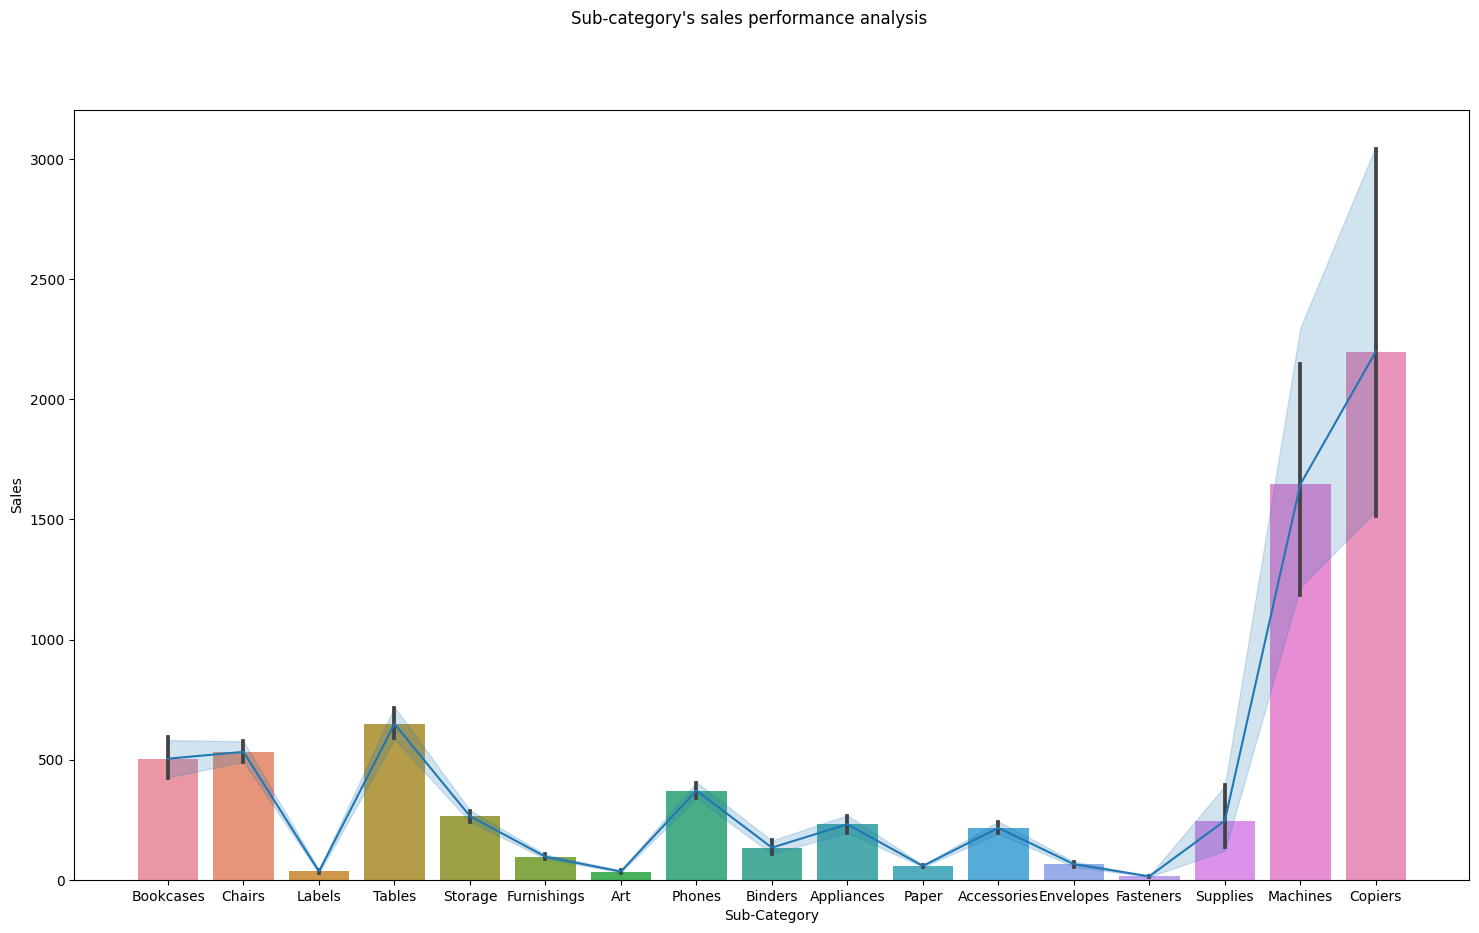

In [174]:
fig, ax = plt.subplots(figsize=(18, 10))
fig.suptitle("Sub-category's sales performance analysis")
sns.barplot(sample_data,x = 'Sub-Category', y = 'Sales', ax=ax)
sns.lineplot(sample_data,x = 'Sub-Category', y = 'Sales', ax=ax)
plt.show()

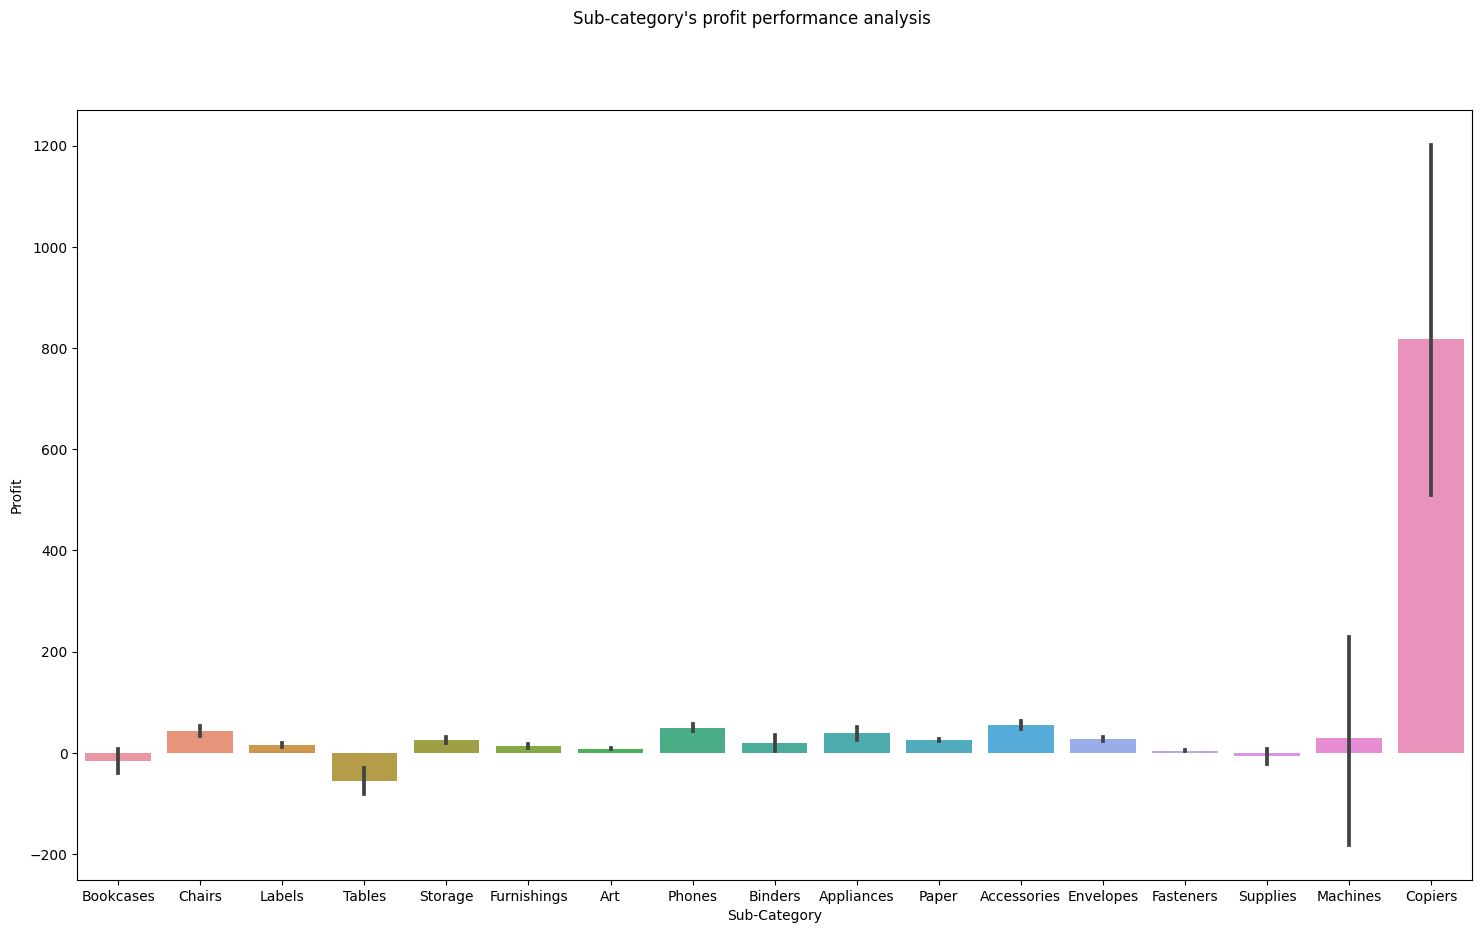

In [175]:
fig, ax = plt.subplots(figsize=(18, 10))
fig.suptitle("Sub-category's profit performance analysis")
sns.barplot(sample_data,y = 'Profit',x = 'Sub-Category', ax=ax)
plt.show()

In [176]:
sample_data_copy = sample_data
sample_data_copy.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


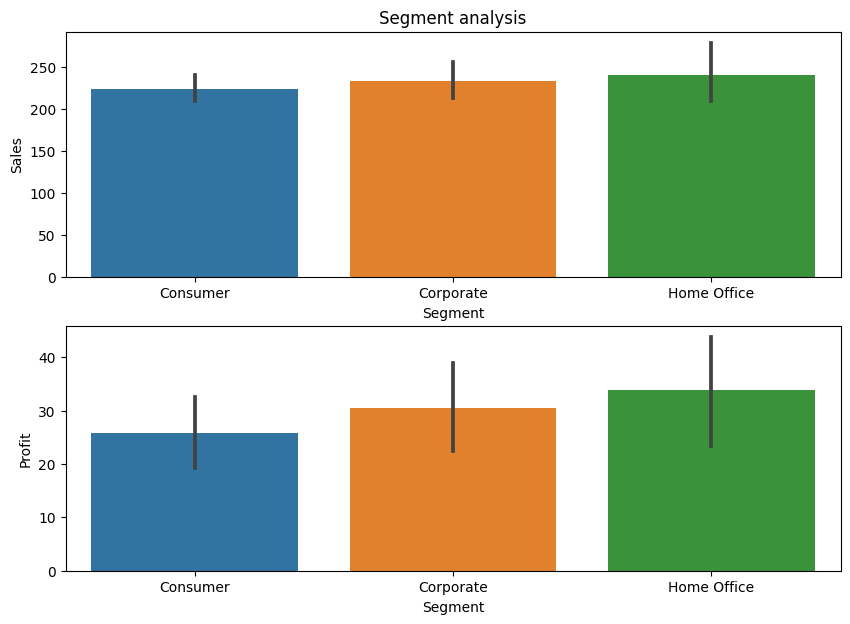

In [177]:
fig, ax = plt.subplots(2,1,figsize = (10,7))
sns.barplot(sample_data_copy,x = 'Segment',y= 'Sales', ax= ax[0]).set_title('Segment analysis')
sns.barplot(sample_data_copy,x = 'Segment',y= 'Profit', ax= ax[1])
plt.show()

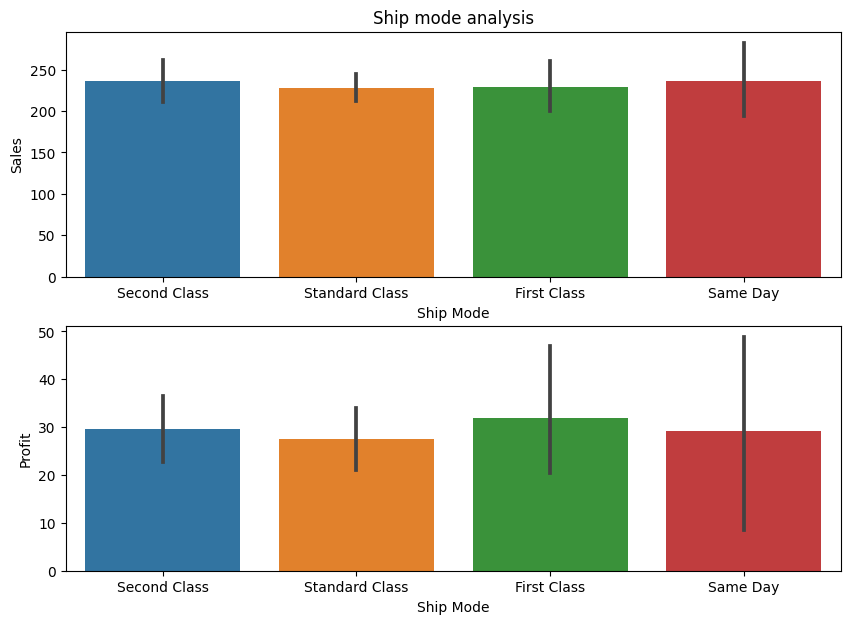

In [178]:
fig, ax = plt.subplots(2,1,figsize = (10,7))
sns.barplot(sample_data_copy ,x = 'Ship Mode',y= 'Sales',ax = ax[0]).set_title('Ship mode analysis')
sns.barplot(sample_data_copy ,x = 'Ship Mode',y= 'Profit',ax = ax[1])
plt.show()

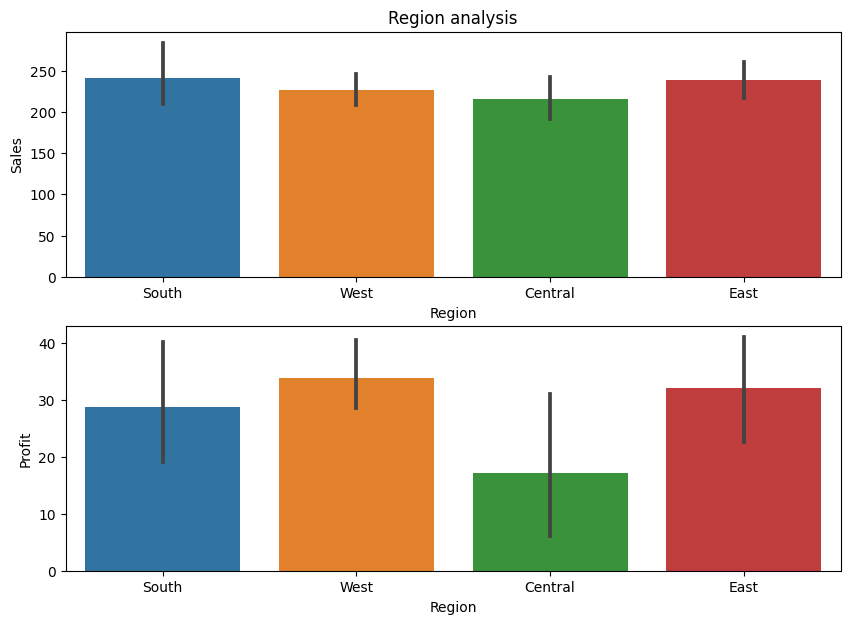

In [179]:
fig, ax = plt.subplots(2,1,figsize = (10,7))
sns.barplot(sample_data_copy ,x = 'Region',y= 'Sales', ax = ax[0]).set_title('Region analysis')
sns.barplot(sample_data_copy ,x = 'Region',y= 'Profit', ax = ax[1])
plt.show()

In [180]:
sample_data_copy["Ship Time"] = sample_data_copy["Ship Date"] - sample_data_copy['Order Date']

In [181]:
sample_data_copy.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Ship Time
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3 days
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3 days
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4 days
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7 days
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7 days


In [182]:
sample_data_copy['Ship Time'].describe()

count                         9994
mean     3 days 22:59:46.311787072
std      1 days 17:56:29.766161104
min                0 days 00:00:00
25%                3 days 00:00:00
50%                4 days 00:00:00
75%                5 days 00:00:00
max                7 days 00:00:00
Name: Ship Time, dtype: object

- We can see here, the longest time for shipping is 7 days
- Min is 0 day that mean all the orders are shipped successful
- Average shipping time is nearly 4 days.


In [183]:
sample_data_copy['Ship Time'].unique()

<TimedeltaArray>
['3 days', '4 days', '7 days', '5 days', '2 days', '6 days', '1 days',
 '0 days']
Length: 8, dtype: timedelta64[ns]

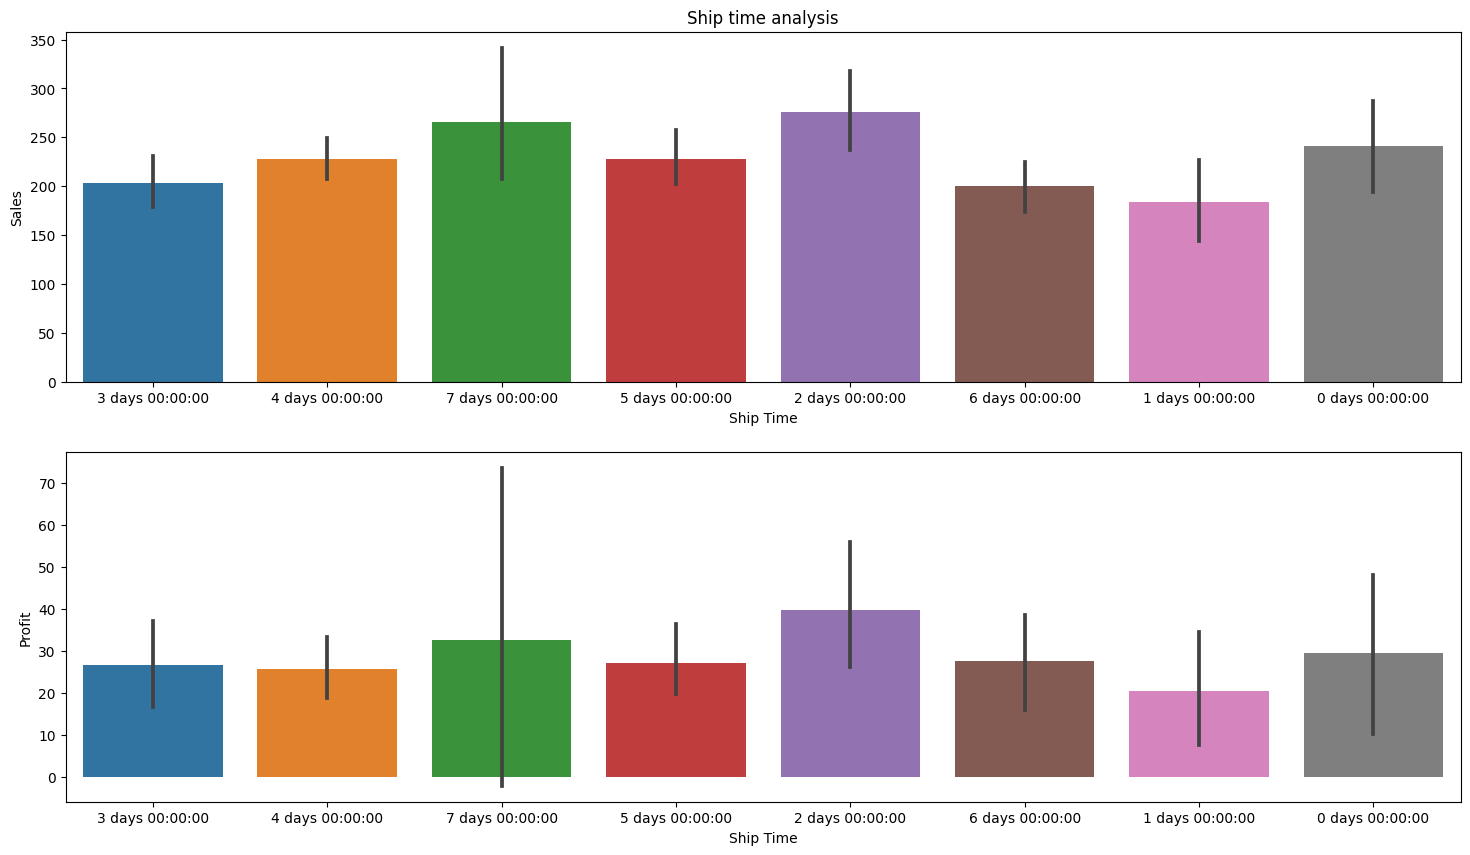

In [184]:
fig, ax = plt.subplots(2,1,figsize=(18, 10))
sns.barplot(sample_data_copy ,x = 'Ship Time',y= 'Sales',ax = ax[0]).set_title('Ship time analysis')
sns.barplot(sample_data_copy ,x = 'Ship Time',y= 'Profit',ax = ax[1])
plt.show()

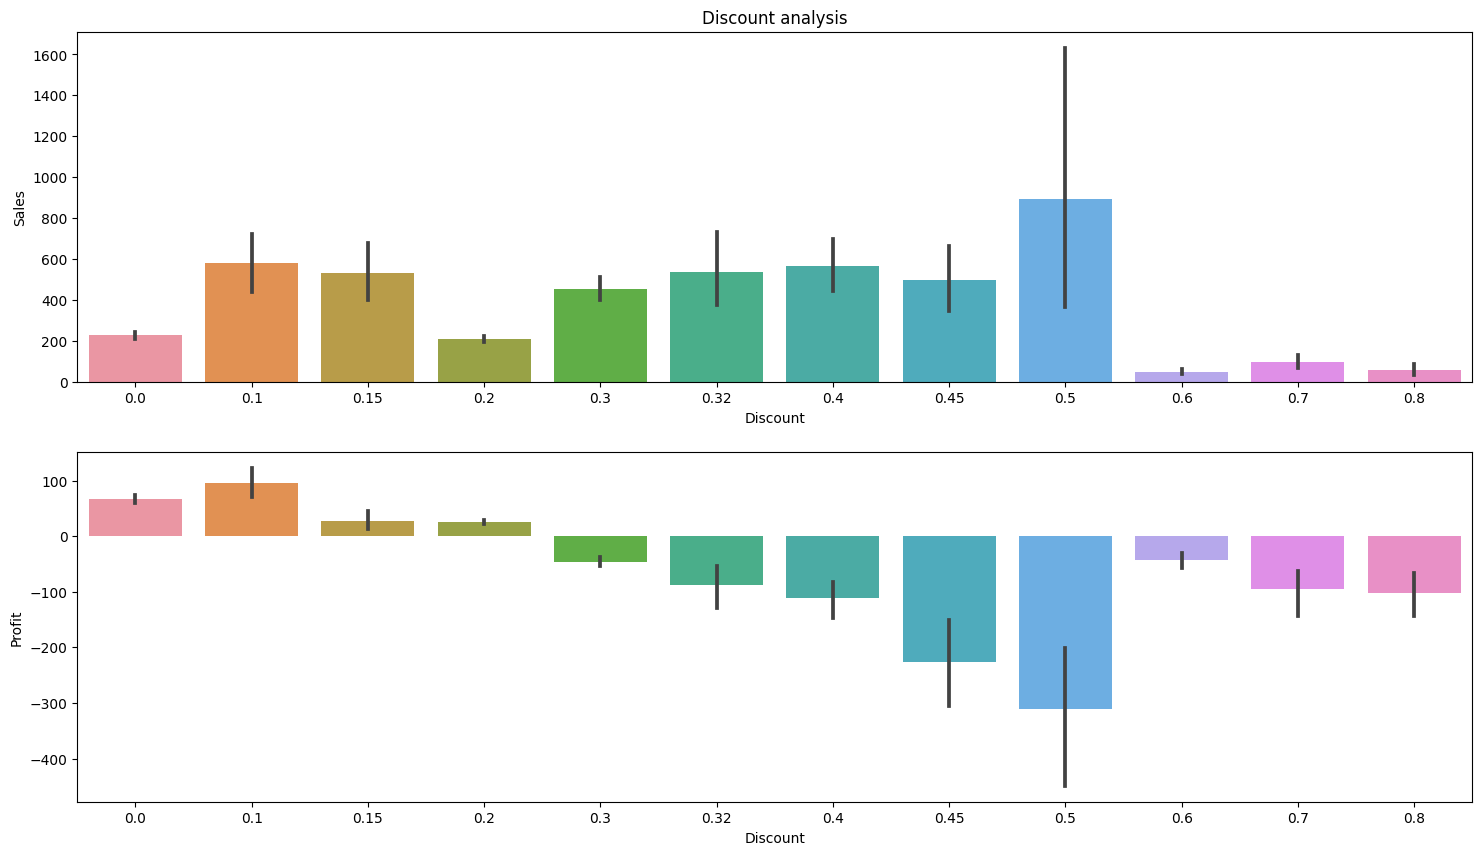

In [185]:
fig, ax = plt.subplots(2,1,figsize = (18,10))
sns.barplot(sample_data_copy ,x = 'Discount',y= 'Sales', ax = ax[0]).set_title('Discount analysis')
sns.barplot(sample_data_copy ,x = 'Discount',y= 'Profit',ax = ax[1])

plt.show()

In [186]:
sample_data_copy['Profit'].describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

In [187]:
sample_data_copy['Year'] = pd.DatetimeIndex(sample_data_copy['Order Date']).year
sample_data_copy['Month'] = pd.DatetimeIndex(sample_data_copy['Order Date']).month
sample_data_copy.head()


,Order Date,Ship Date,Ship Mode,Customer Name,Segment,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Ship Time,Year,Month
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3 days,2016,11
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3 days,2016,11
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4 days,2016,6
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7 days,2015,10
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7 days,2015,10


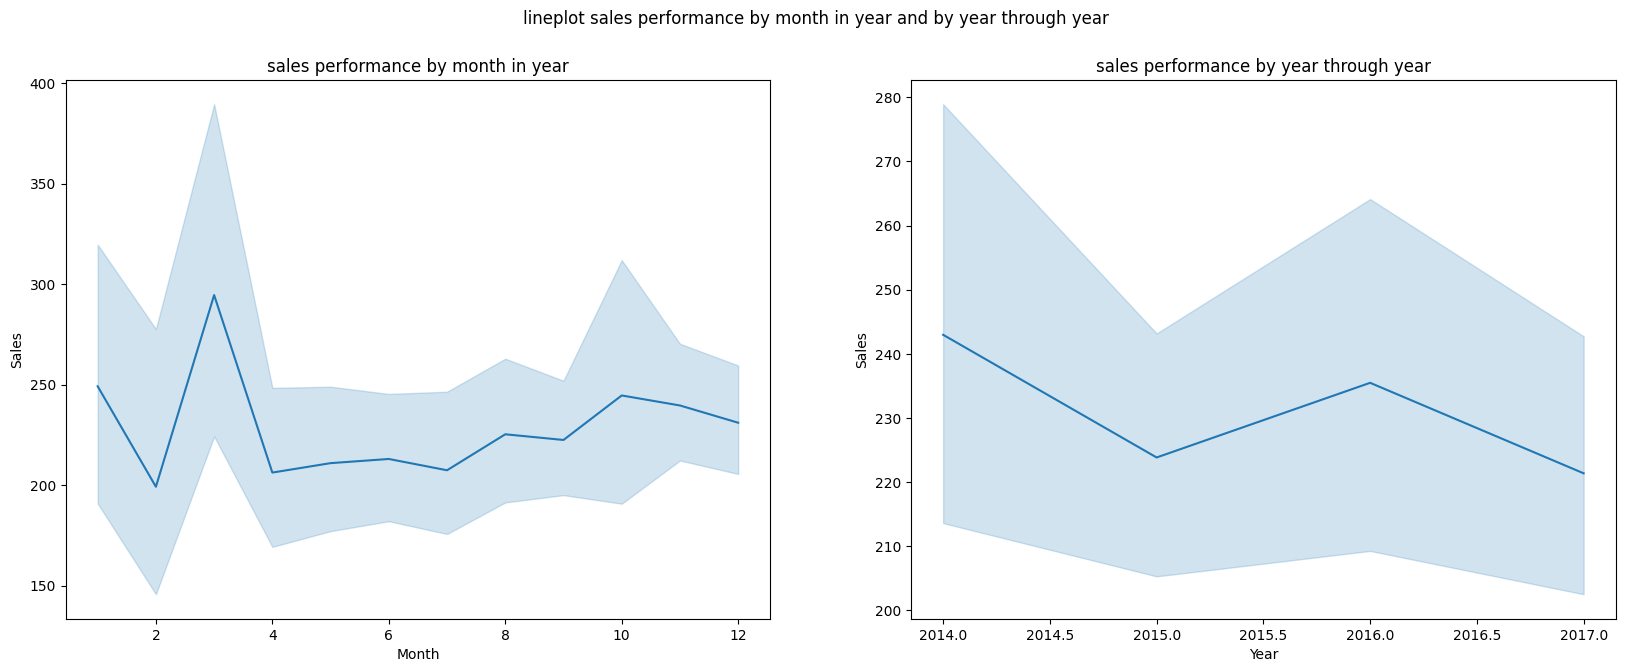

In [188]:
fig, axes = plt.subplots(1,2, figsize = (20,7))
fig.suptitle('lineplot sales performance by month in year and by year through year')
axes[0].set_title('sales performance by month in year')
axes[1].set_title('sales performance by year through year')

sns.lineplot(data=sample_data_copy, x= "Month", y = "Sales",ax=axes[0])
sns.lineplot(data=sample_data_copy, x= "Year", y = "Sales",ax=axes[1])
plt.show()

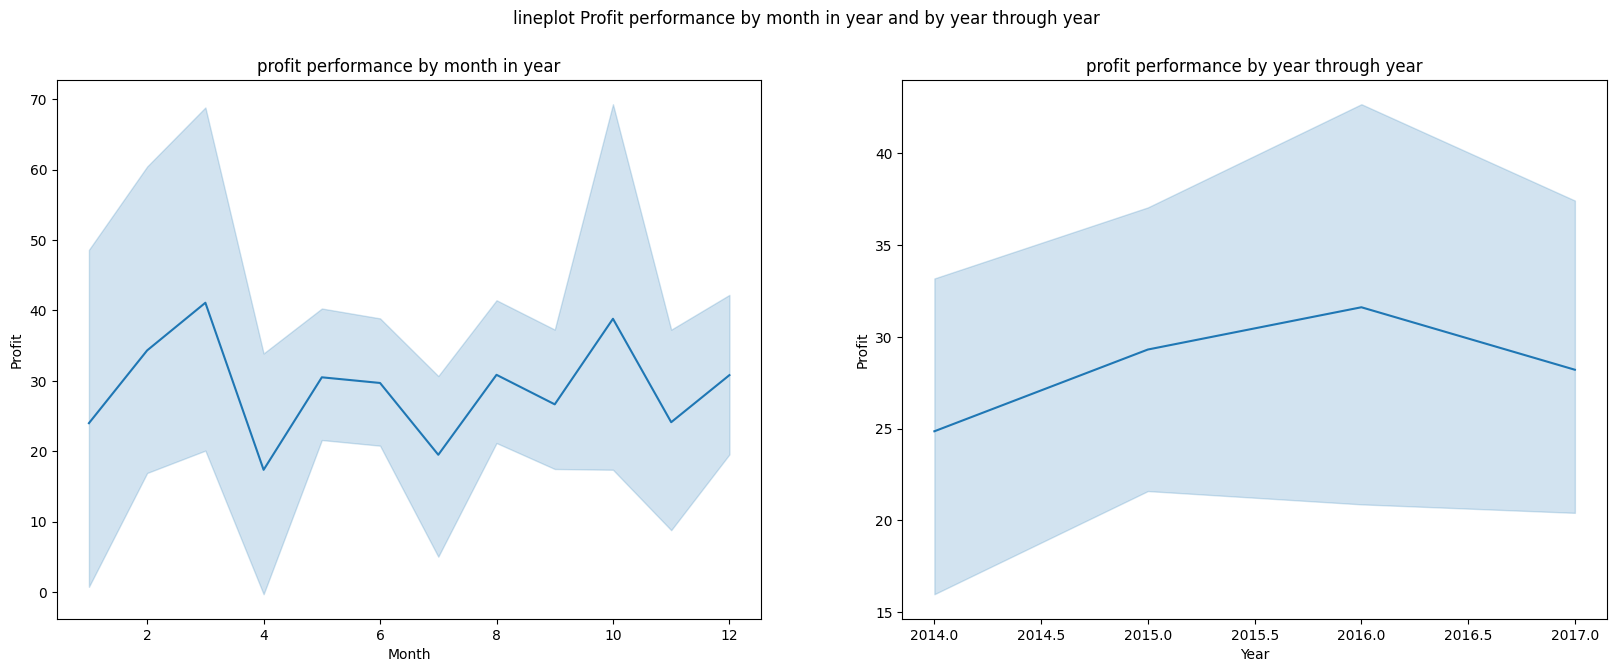

In [189]:
fig, axes = plt.subplots(1,2, figsize = (20,7))
fig.suptitle('lineplot Profit performance by month in year and by year through year')
axes[0].set_title('profit performance by month in year')
axes[1].set_title('profit performance by year through year')
sns.lineplot(data=sample_data_copy, x= "Month", y = "Profit",ax=axes[0])
sns.lineplot(data=sample_data_copy, x= "Year", y = "Profit",ax=axes[1])
plt.show()

What is the stuff take longest time to ship?

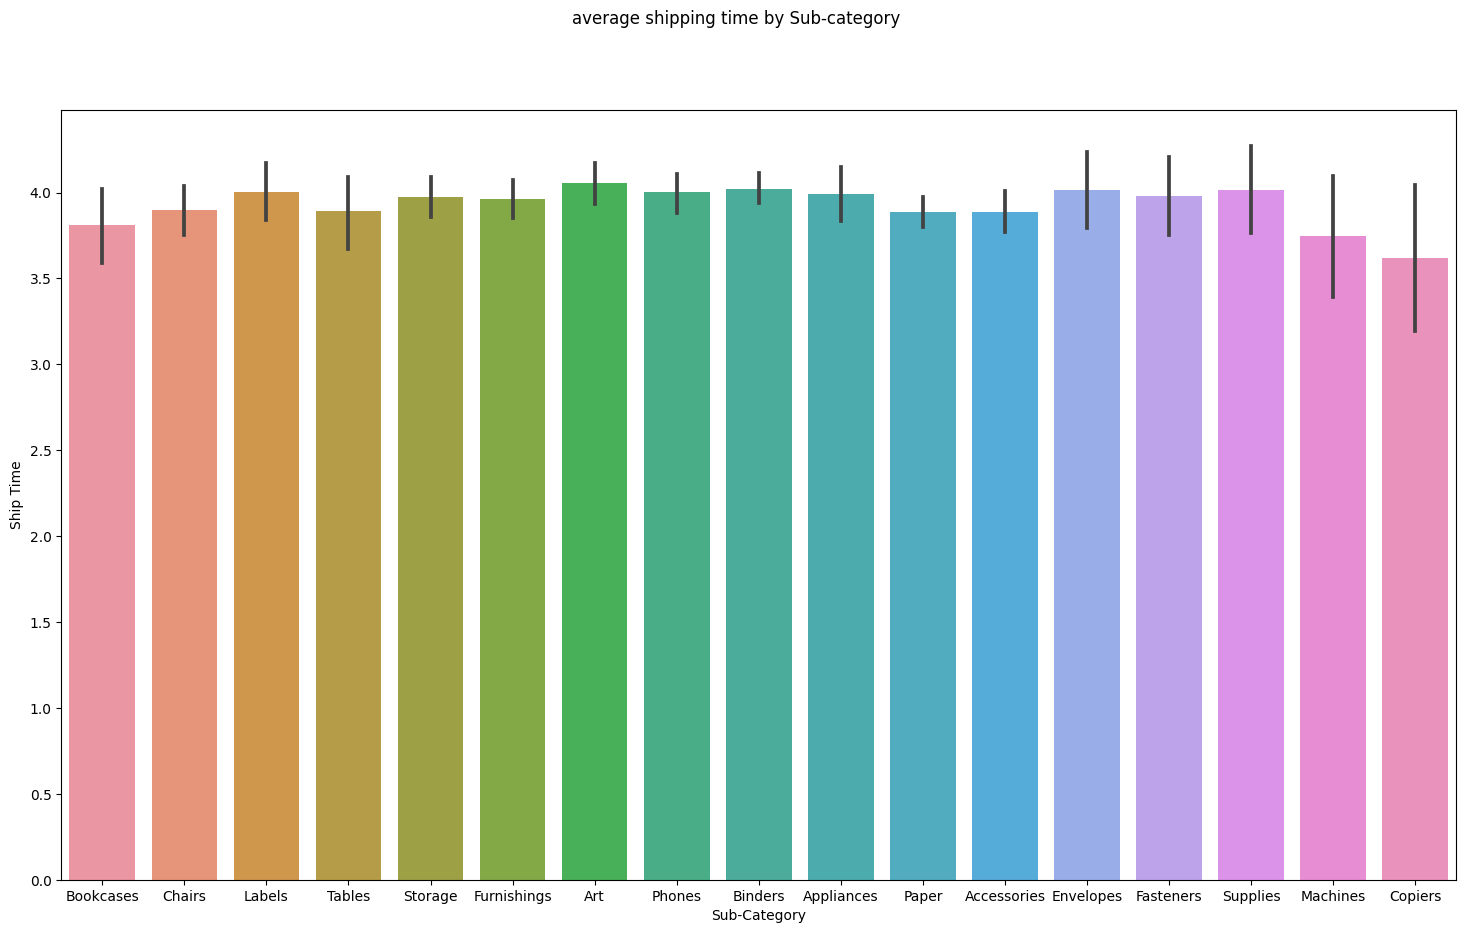

In [190]:
sample_data_copy['Ship Time'] = sample_data_copy['Ship Time'].dt.days
fig, ax = plt.subplots(figsize=(18, 10))
fig.suptitle('average shipping time by Sub-category')
sns.barplot(data= sample_data_copy, y = 'Ship Time', x = "Sub-Category") 
plt.show()

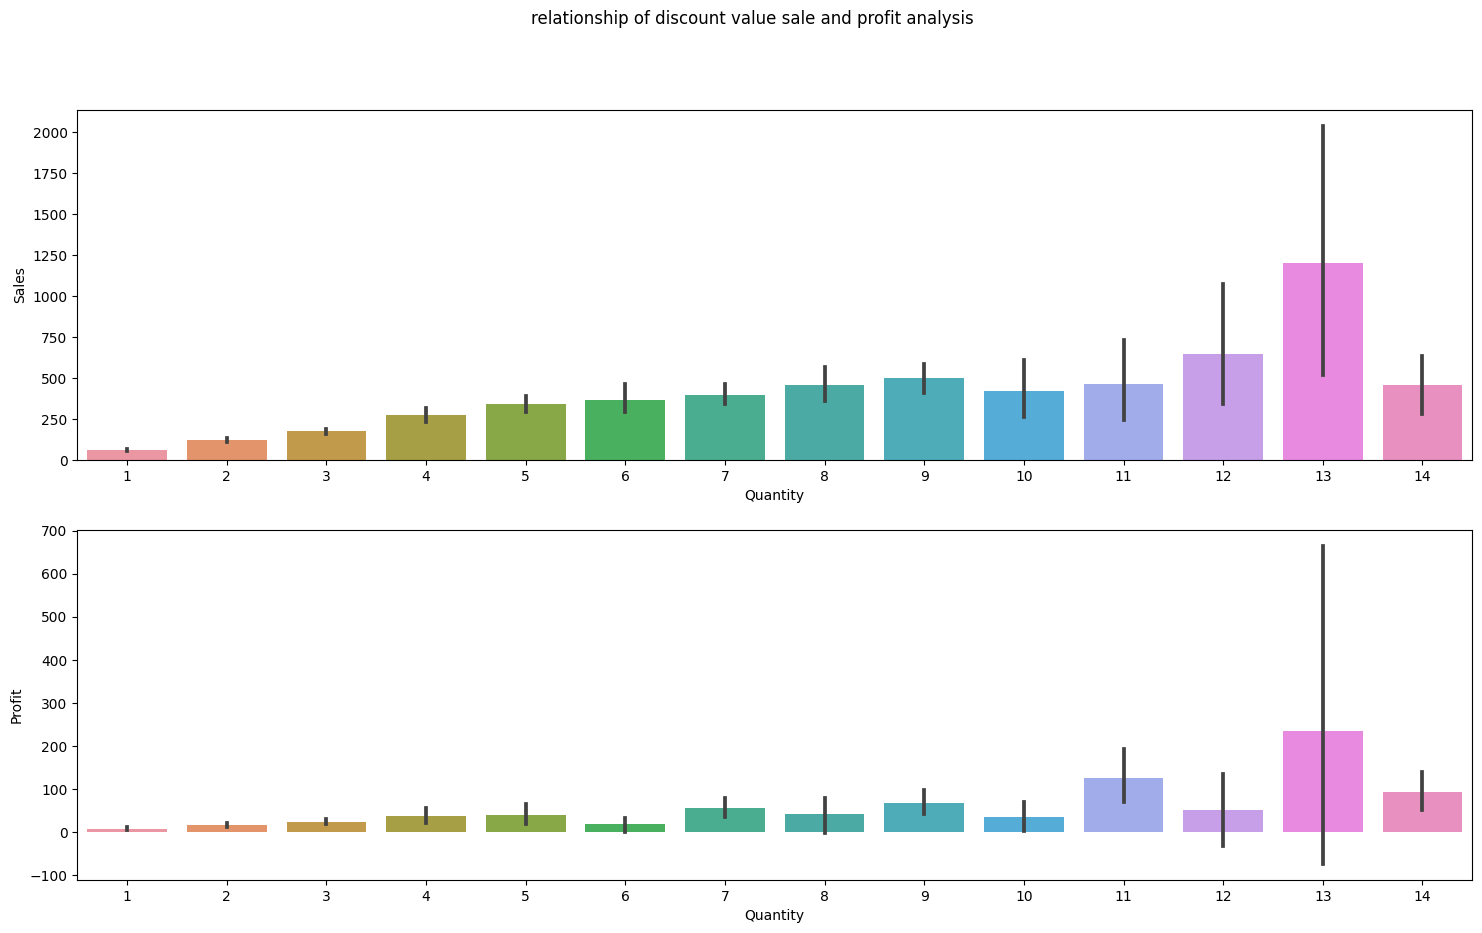

In [191]:
fig, ax = plt.subplots(2,1,figsize = (18,10))
fig.suptitle('relationship of discount value sale and profit analysis')
sns.barplot(sample_data_copy ,x = 'Quantity',y= 'Sales', ax = ax[0])
sns.barplot(sample_data_copy ,x = 'Quantity',y= 'Profit',ax = ax[1])

plt.show()

In [197]:
sample_data_copy_sort_by_sales = sample_data_copy.sort_values('Sales',ascending = False).head(10)
sample_data_copy_sort_by_sales.head(10)

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Ship Time,Year,Month
2697,2014-03-18,2014-03-23,Standard Class,Sean Miller,Home Office,Florida,South,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784,5,2014,3
6826,2016-10-02,2016-10-09,Standard Class,Tamara Chand,Corporate,Indiana,Central,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760,7,2016,10
8153,2017-03-23,2017-03-25,First Class,Raymond Buch,Consumer,Washington,West,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808,2,2017,3
2623,2017-10-22,2017-10-24,First Class,Tom Ashbrook,Home Office,New York,East,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888,2,2017,10
4190,2017-11-17,2017-11-22,Standard Class,Hunter Lopez,Consumer,Delaware,East,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856,5,2017,11
9039,2016-12-17,2016-12-21,Standard Class,Adrian Barton,Consumer,Michigan,Central,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892.740,13,0.0,4946.3700,4,2016,12
4098,2014-09-23,2014-09-28,Standard Class,Sanjit Chand,Consumer,Minnesota,Central,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,9449.950,5,0.0,4630.4755,5,2014,9
4277,2016-04-16,2016-04-20,Standard Class,Bill Shonely,Corporate,New Jersey,East,Technology,Machines,"3D Systems Cube Printer, 2nd Generation, Magenta",9099.930,7,0.0,2365.9818,4,2016,4
8488,2016-02-02,2016-02-04,Second Class,Sanjit Engle,Consumer,Virginia,South,Technology,Machines,HP Designjet T520 Inkjet Large Format Printer ...,8749.950,5,0.0,2799.9840,2,2016,2
6425,2016-05-23,2016-05-27,Standard Class,Christopher Conant,Consumer,Pennsylvania,East,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,8399.976,4,0.4,1119.9968,4,2016,5


In [198]:
sample_data_copy_sort_by_profit = sample_data_copy.sort_values('Profit',ascending = False).head(10)
sample_data_copy_sort_by_profit.head(10)

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Ship Time,Year,Month
6826,2016-10-02,2016-10-09,Standard Class,Tamara Chand,Corporate,Indiana,Central,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760,7,2016,10
8153,2017-03-23,2017-03-25,First Class,Raymond Buch,Consumer,Washington,West,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808,2,2017,3
4190,2017-11-17,2017-11-22,Standard Class,Hunter Lopez,Consumer,Delaware,East,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856,5,2017,11
9039,2016-12-17,2016-12-21,Standard Class,Adrian Barton,Consumer,Michigan,Central,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892.740,13,0.0,4946.3700,4,2016,12
4098,2014-09-23,2014-09-28,Standard Class,Sanjit Chand,Consumer,Minnesota,Central,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,9449.950,5,0.0,4630.4755,5,2014,9
2623,2017-10-22,2017-10-24,First Class,Tom Ashbrook,Home Office,New York,East,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888,2,2017,10
509,2015-03-16,2015-03-22,Standard Class,Christopher Martinez,Consumer,Georgia,South,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,6354.950,5,0.0,3177.4750,6,2015,3
8488,2016-02-02,2016-02-04,Second Class,Sanjit Engle,Consumer,Virginia,South,Technology,Machines,HP Designjet T520 Inkjet Large Format Printer ...,8749.950,5,0.0,2799.9840,2,2016,2
7666,2016-10-04,2016-10-08,Standard Class,Daniel Raglin,Home Office,Rhode Island,East,Technology,Copiers,Hewlett Packard LaserJet 3310 Copier,5399.910,9,0.0,2591.9568,4,2016,10
6520,2017-01-16,2017-01-18,Second Class,Andy Reiter,Consumer,Michigan,Central,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,5443.960,4,0.0,2504.2216,2,2017,1
